## Toolbox Loading

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd
import re

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
from xgboost import *

#Model evaluation
from sklearn.metrics import *

#Warnings
import warnings
warnings.filterwarnings('ignore')

#Future Predictions
import pickle

In [2]:
#loading dataset
adult = pd.read_csv(r'C:\Users\USER1\Desktop\adult.csv')

## Data Exploration

In [3]:
#Checking shape of dataset
adult.shape

(32561, 15)

In [4]:
#first 7 rows of the dataset
adult.head(7)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [5]:
#last 5 rows of the dataset
adult.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# Looking at information about the columns
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#dataset columns
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
#statistical description of the dataset
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
#statistical description of categorical columns of the dataset
adult.describe(include = 'object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


## Data Cleaning

In [10]:
# Restrict column names to alphanumeric characters with underscore separator
adult.rename(columns= lambda x: re.sub("[^A-Za-z0-9_]+", "_", x), inplace= True)
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
#checking  for nulll inputs
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
#replacing unwanted characters
adult[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']] = adult[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']].replace('?', np.NaN)

In [13]:
#checking for null values
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

<AxesSubplot:>

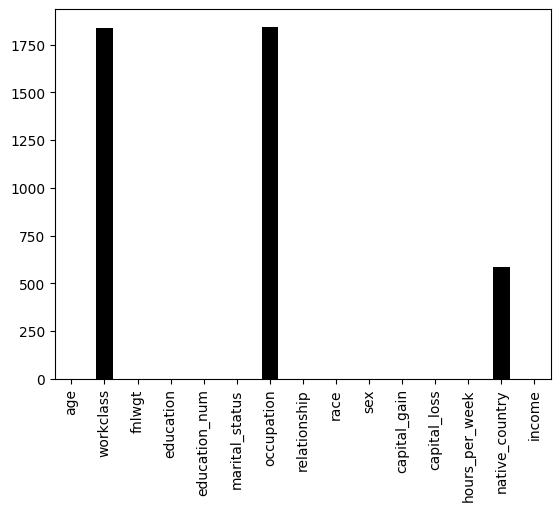

In [14]:
#showing a plot of null values in the dataset
adult.isnull().sum().plot(kind = 'bar', color ='k')

In [15]:
#Dropping Null values
adult_c = adult.dropna()

In [16]:
#checking for null values
adult_c.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
adult_c.shape

(30162, 15)

In [18]:
# How many are the duplicates?
adult_c[adult_c.duplicated()].shape

(23, 15)

In [19]:
# Drop the duplicates
adult_c.drop_duplicates(inplace = True, ignore_index=True)

# Confirm removal of duplicates
adult_c[adult_c.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [20]:
adult_c.shape

(30139, 15)

## Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>]], dtype=object)

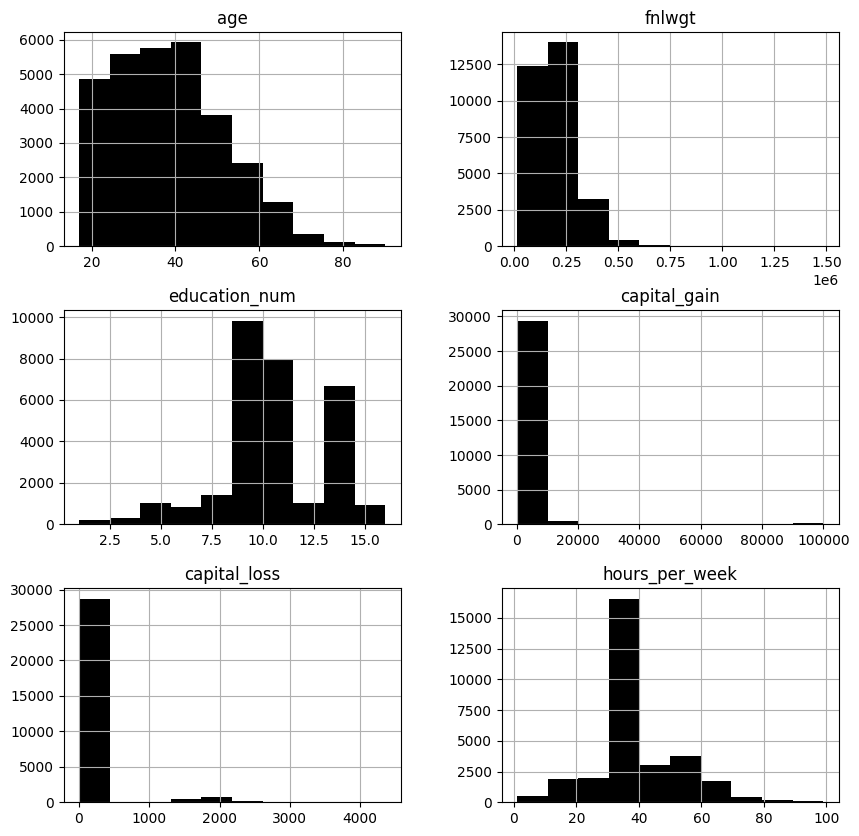

In [21]:
#showing a distribution of numerical columns in the dataset
adult_c.hist(figsize = (10,10), color = 'k')

<AxesSubplot:>

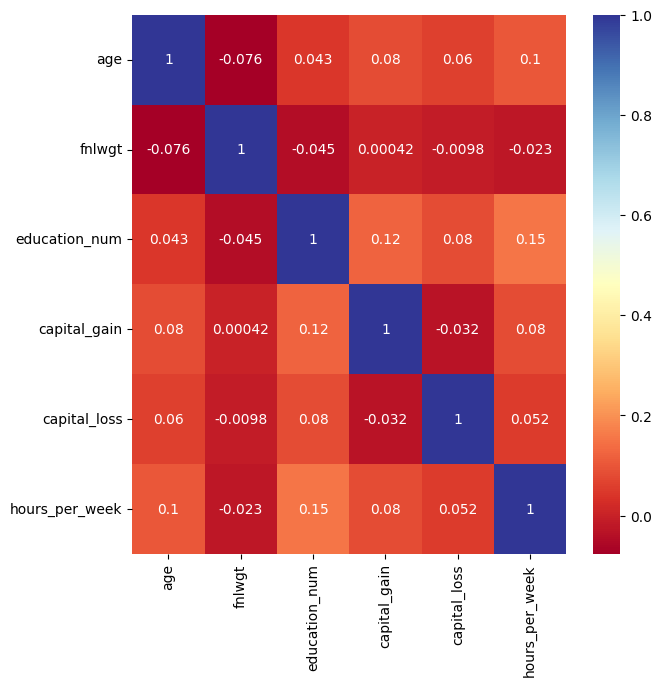

In [22]:
#showing a heatmap of the correlation between numerical columns in the dataset
plt.figure(figsize = (7,7))
sns.heatmap(adult_c.corr(), annot = True, cmap = 'RdYlBu')

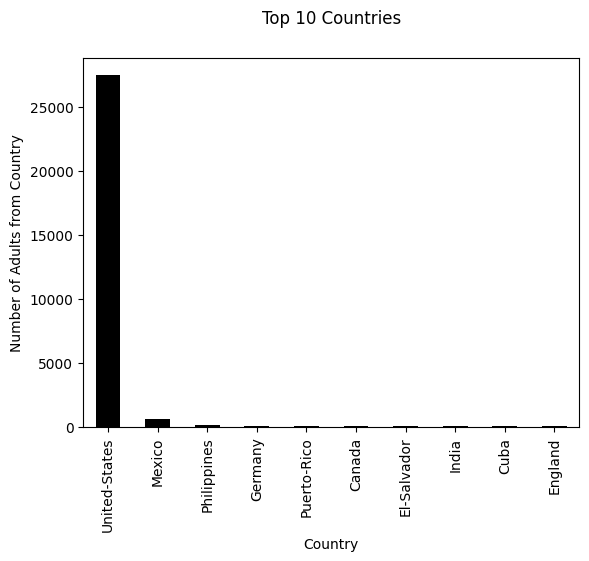

In [23]:
adult_c.native_country.value_counts()[:10].plot(kind='bar', color ='k')
plt.title('Top 10 Countries', y=1.07)
plt.xlabel('Country')
plt.ylabel('Number of Adults from Country')
plt.show()

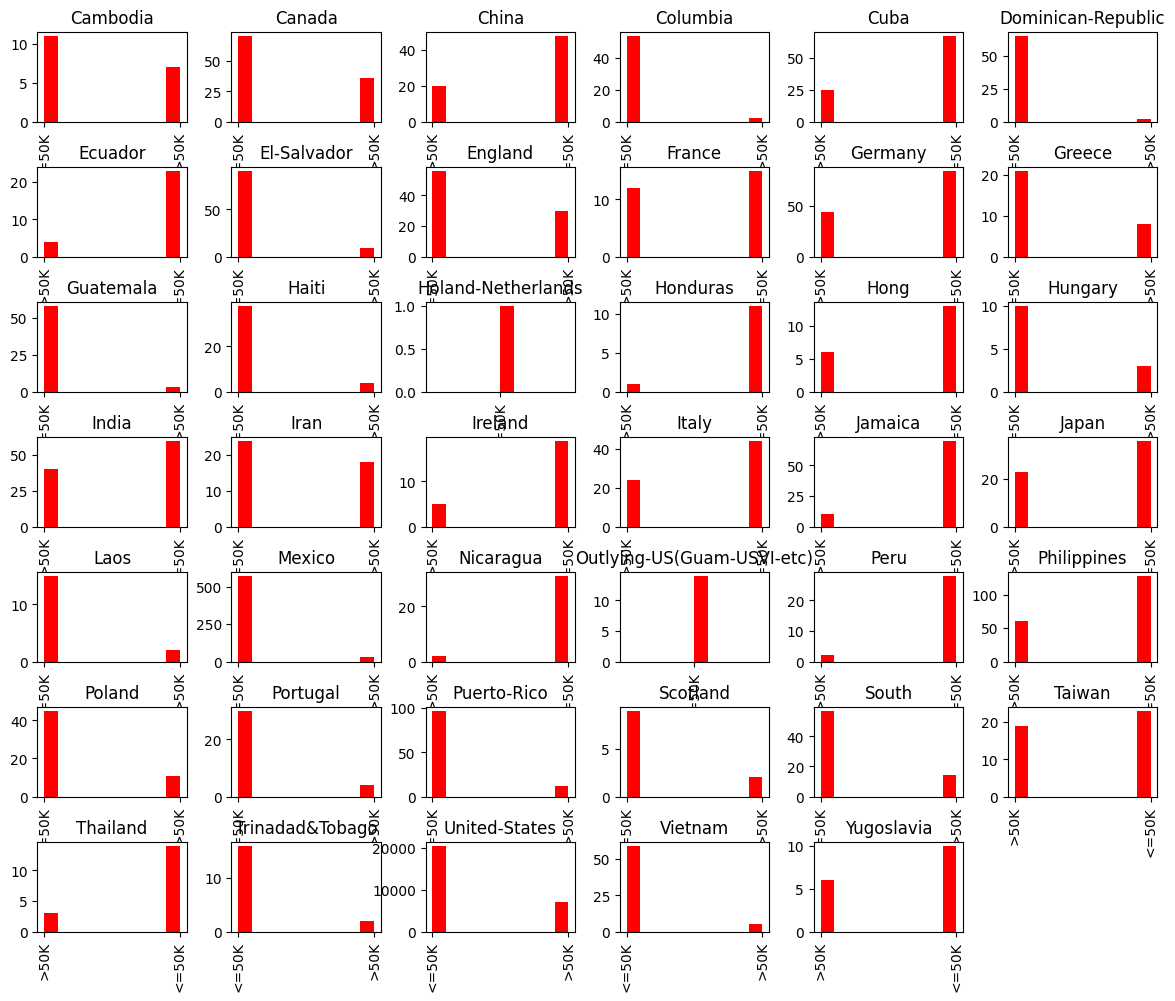

In [24]:
#showing an analysis of imcome grouped by native_country
adult_c.hist('income', by='native_country',color = 'r', figsize =( 14,12))
plt.show()

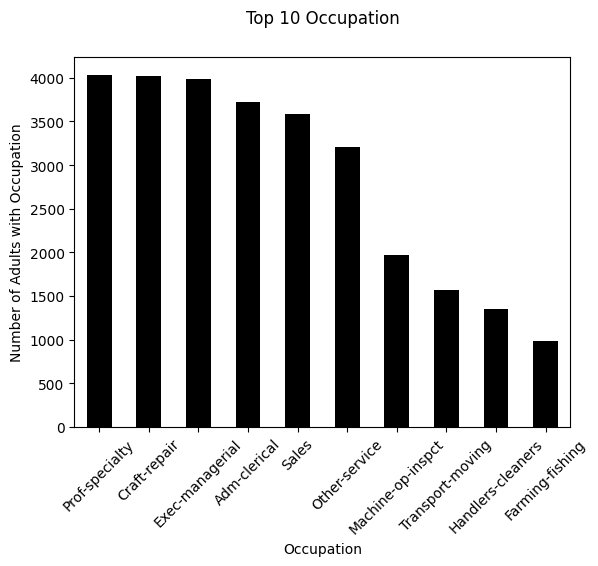

In [25]:
#showing a plot of the top 10 occupations
adult_c.occupation.value_counts()[:10].plot(kind='bar', color ='k')
plt.title('Top 10 Occupation', y=1.07)
plt.xlabel('Occupation')
plt.ylabel('Number of Adults with Occupation')
plt.xticks(rotation = 45)
plt.show()

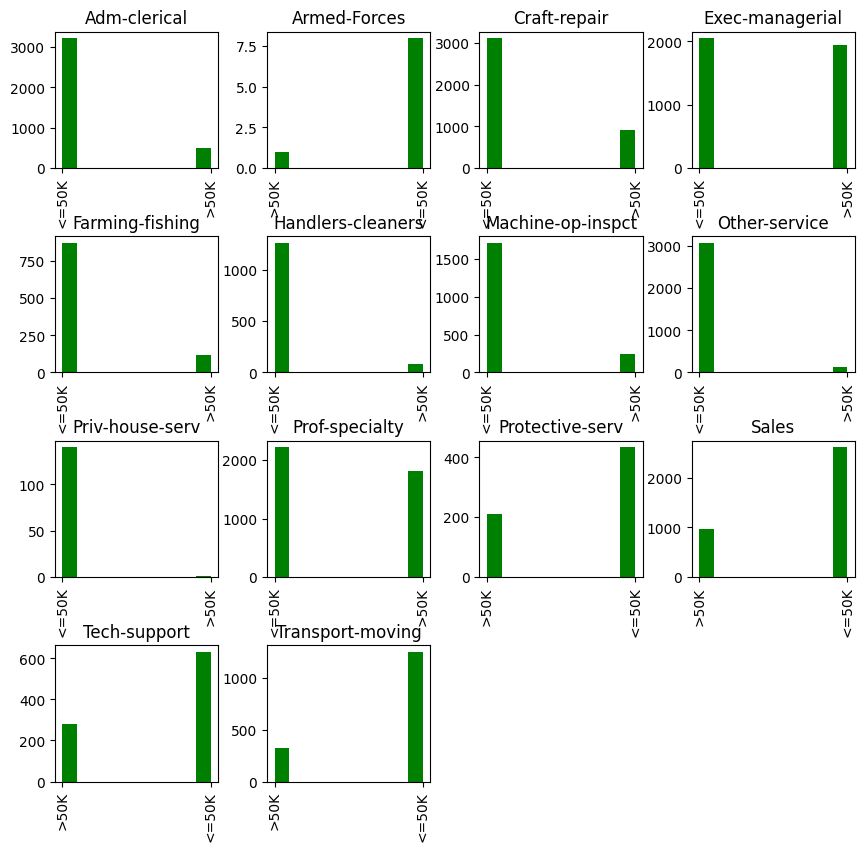

In [26]:
#showing an analysis of imcome grouped by occupation
adult_c.hist('income', by='occupation',color = 'g', figsize =( 10,10))
plt.show()

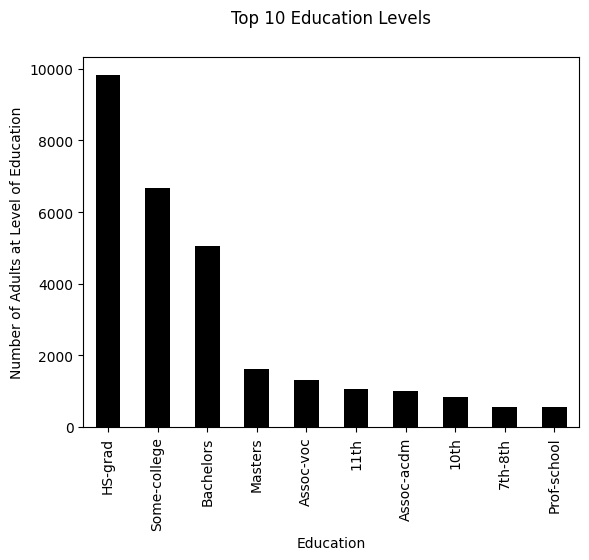

In [27]:
#showing a countplot of the top 10 educational levels
adult_c.education.value_counts()[:10].sort_values(ascending=False).plot(kind='bar', color ='k')
plt.title('Top 10 Education Levels', y=1.07)
plt.xlabel('Education')
plt.ylabel('Number of Adults at Level of Education')
plt.show()

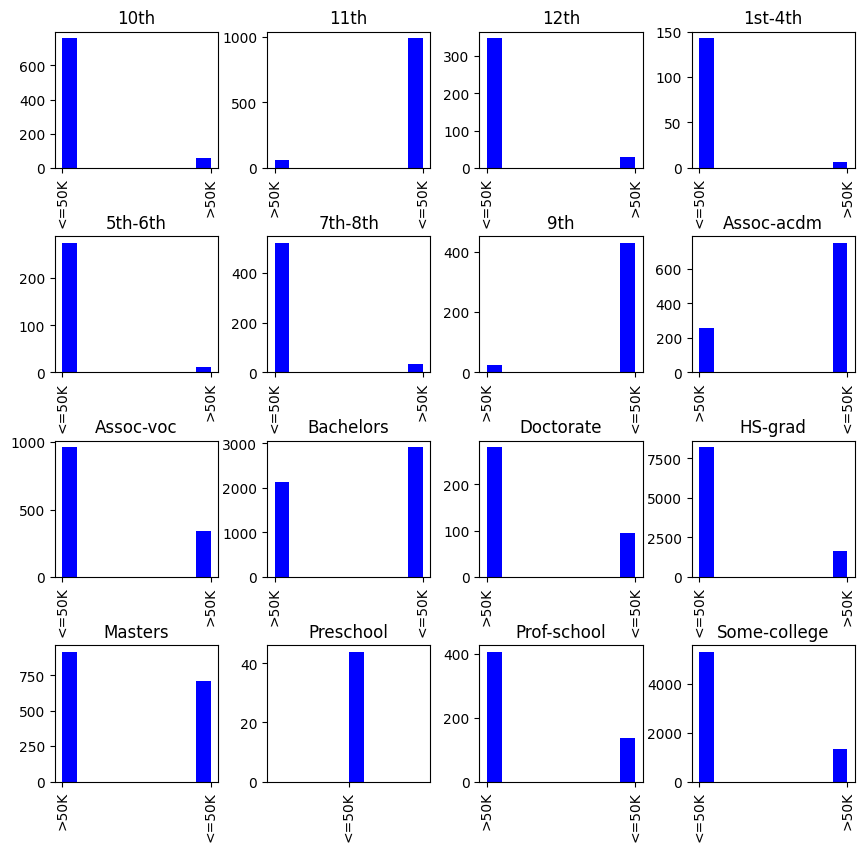

In [28]:
#showing an analysis of imcome grouped by education level
adult_c.hist('income', by='education',color = 'b', figsize =( 10,10))
plt.show()

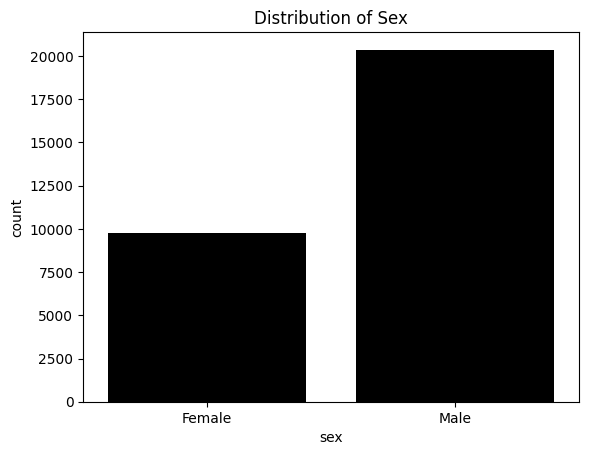

In [29]:
# showing a countplot of the distribution of sex
sns.countplot(x=adult_c.sex, color='k')
plt.title('Distribution of Sex')
plt.show()

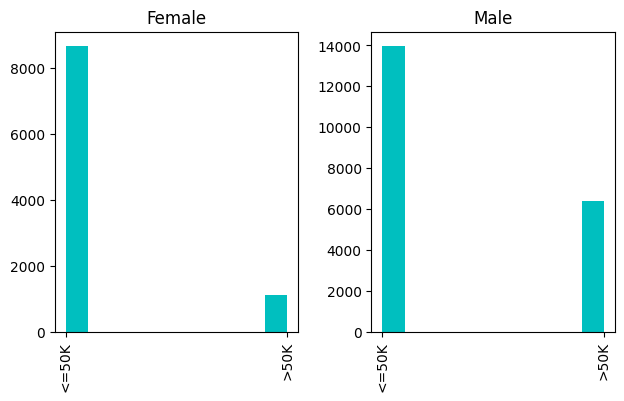

In [30]:
#showing an analysis of imcome grouped by sex
adult_c.hist('income', by='sex',color = 'c', figsize =( 7,4))
plt.show()

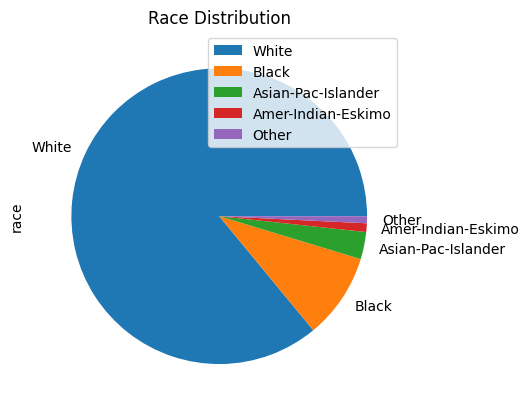

In [31]:
#showing a chart of race distribution
adult_c.race.value_counts().plot(kind='pie',labels=adult.race.value_counts().index)
plt.legend()
plt.title('Race Distribution')
plt.show()

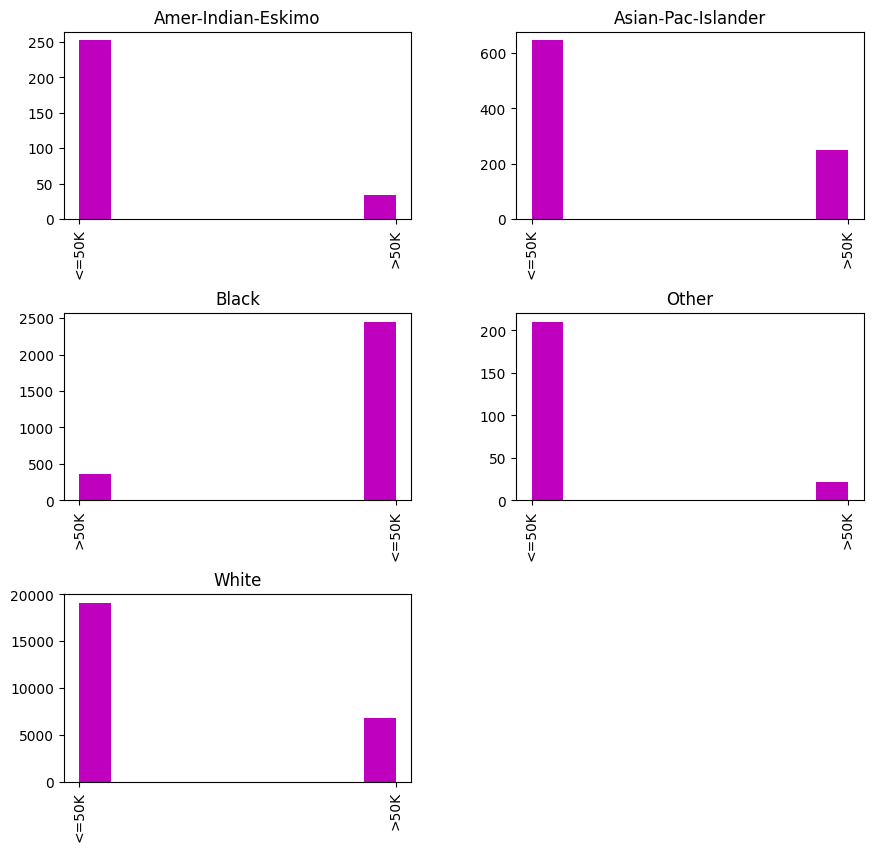

In [32]:
#showing an analysis of imcome grouped by race
adult_c.hist('income', by='race',color = 'm', figsize =( 10,10));
plt.show()

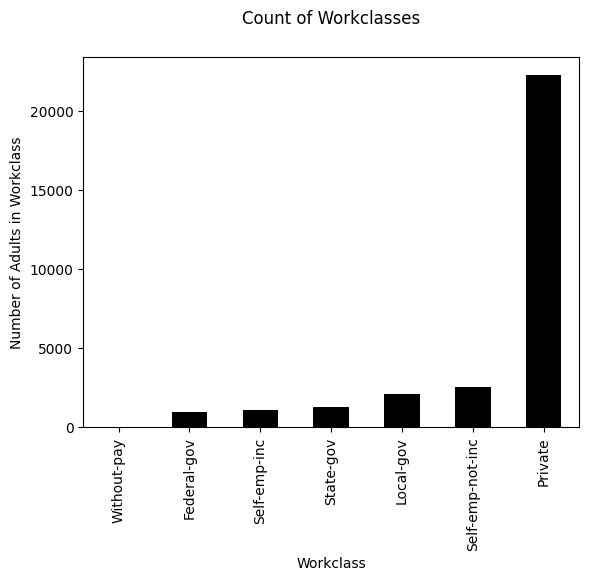

In [33]:
#showing a countplot of Workclasses
adult_c.workclass.value_counts().sort_values().plot(kind='bar', color ='k')
plt.title('Count of Workclasses', y=1.07)
plt.xlabel('Workclass')
plt.ylabel('Number of Adults in Workclass')
plt.show()

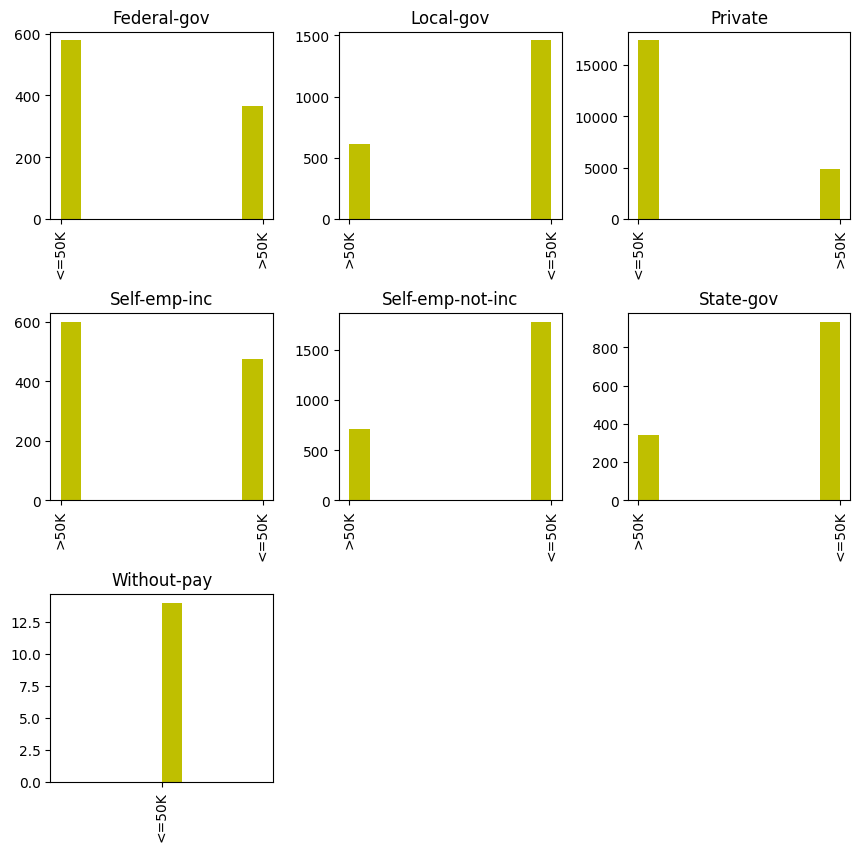

In [34]:
#showing an analysis of imcome grouped by workclass
adult_c.hist('income', by='workclass',color = 'y', figsize =( 10,10))
plt.show()

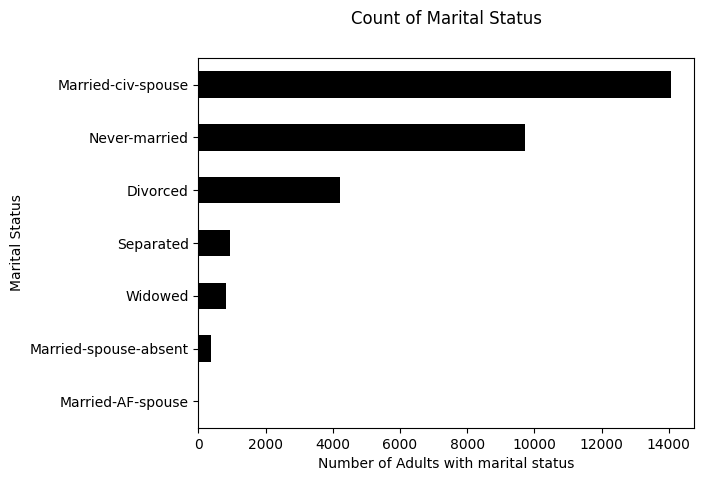

In [35]:
#showing a countplot of marital status
adult_c.marital_status.value_counts().sort_values().plot(kind='barh', color ='k')
plt.title('Count of Marital Status', y=1.07)
plt.xlabel('Number of Adults with marital status')
plt.ylabel('Marital Status')
plt.show()

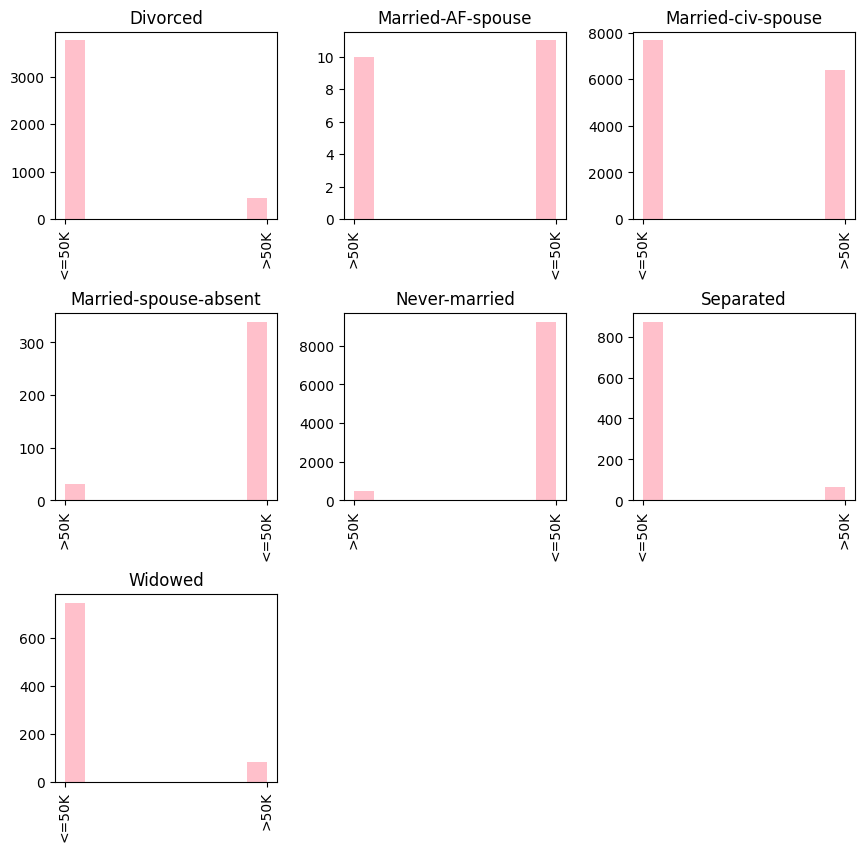

In [36]:
#showing an analysis of imcome grouped by marital status
adult_c.hist('income', by='marital_status',color = 'pink', figsize =( 10,10))
plt.show()

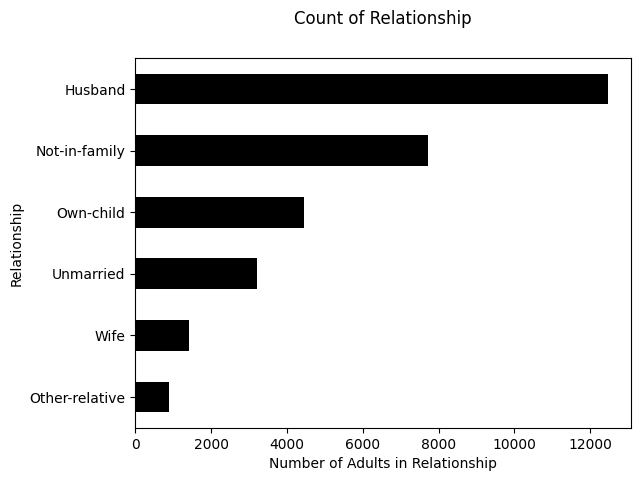

In [37]:
#showing a countplot of relationship
adult_c.relationship.value_counts().sort_values().plot(kind='barh', color ='k')
plt.title('Count of Relationship', y=1.07)
plt.xlabel('Number of Adults in Relationship')
plt.ylabel('Relationship')
plt.show()

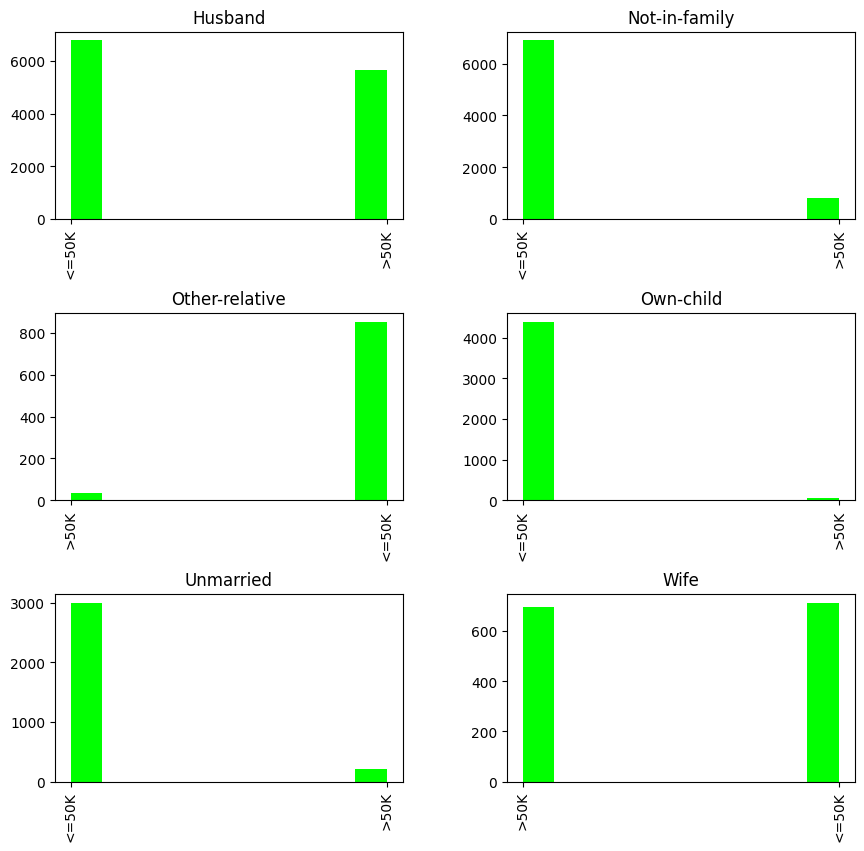

In [38]:
#showing an analysis of imcome grouped by relationship
adult_c.hist('income', by='relationship',color = 'lime', figsize =( 10,10))
plt.show()

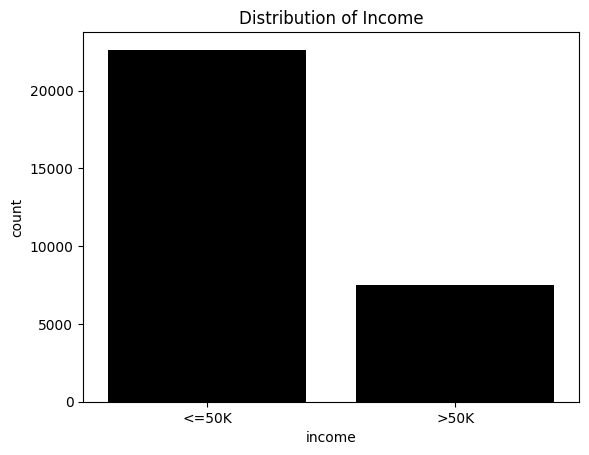

In [39]:
sns.countplot(x=adult_c.income, color='k')
plt.title('Distribution of Income')
plt.show()

## Feature Engineering

In [40]:
# Looking at the unique values in each column
adult_c.nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        118
capital_loss         90
hours_per_week       94
native_country       41
income                2
dtype: int64

In [41]:
# Encoding the income column
adult_c["income"].replace({">50K":1, "<=50K":0}, inplace= True)

In [42]:
#dropping columns that are highly correlated to other columns
complete_set = adult_c.drop(columns = ['relationship','education'], axis = 1)
complete_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [43]:
#creating list of categorical column
categoricals = [column for column in complete_set.columns if (complete_set[column].dtype == "O")]
categoricals

['workclass', 'marital_status', 'occupation', 'race', 'sex', 'native_country']

In [44]:
# Encoding the categorical variables
oh_encoder = OneHotEncoder(drop = "first", sparse = False)
oh_encoder.fit(complete_set[categoricals])
encoded_categoricals = oh_encoder.transform(adult_c[categoricals])
encoded_categoricals = pd.DataFrame(encoded_categoricals, columns = oh_encoder.get_feature_names_out().tolist())
encoded_categoricals

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30135,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30136,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30137,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
# Adding the encoded categoricals to the DataFrame and dropping the original columns
encoded_set = complete_set.join(encoded_categoricals)
encoded_set.drop(columns= categoricals, inplace= True)
encoded_set

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,82,132870,9,0,4356,18,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,54,140359,4,0,3900,40,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,41,264663,10,0,3900,40,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,34,216864,9,0,3770,45,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,38,150601,6,0,3770,40,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,22,310152,10,0,0,40,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30135,27,257302,12,0,0,38,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30136,40,154374,9,0,0,40,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30137,58,151910,9,0,0,40,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
# Defining the target & predictor variables
X = encoded_set.drop(columns=["income"])
y = encoded_set["income"]

# Splitting the dataframe into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 1, stratify= y)

In [47]:
# Putting the training dataset together for further splitting and modelling
train_data = X_train.join(y_train, on=X_train.index)
train_data.shape

(24111, 77)

In [48]:
# Putting the training dataset together for future model evaluation
test_data = X_test.join(y_test, on=X_test.index)
test_data.shape

(6028, 77)

In [49]:
# Splitting the training dataframe for the SMOTE balancing
X = train_data.drop(columns=["income"])
y = train_data["income"]

In [50]:
# Resampling the dataframe using SMOTE
smote = SMOTE(sampling_strategy="auto")
X, y = smote.fit_resample(X, y)
y.value_counts()

1    18106
0    18106
Name: income, dtype: int64

In [51]:
# Splitting the resampled dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24, stratify=y)
y_train.value_counts()

1    13580
0    13579
Name: income, dtype: int64

In [52]:
#scaling columns
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [53]:
# Instantiate the models
log_reg_model = LogisticRegression(random_state=1)
dt_model = DecisionTreeClassifier(random_state=1)
rf_model = RandomForestClassifier(random_state=1)
knn_model = KNeighborsClassifier(n_neighbors = 5)
svm_model = SVC(random_state=1)
lgb_model = lgb.LGBMClassifier(random_state=1)
xgb_model = XGBClassifier(random_state=1)


In [54]:
# Create a dictionary of models
models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree Classifier": dt_model,
    "Random Forest Model": rf_model,
    "K Neighbor Nearest Algorithm": knn_model,
    "Support Vector Machine": svm_model,
    "LightGBM": lgb_model,
    "XGBoost": xgb_model
}

In [55]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= X_train, X_test= X_test, 
                                 y_train= y_train, y_test= y_test):
    
    # List to collect the results
    results = []
    
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)
        
        # Append model performance results
        results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        accuracy_score(y_test, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")
        
        #The Confusion Matrix of the Predictions
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
        plt.title("The Confusion Matrix of the Predictions", y = 1.05)
        plt.show()
        

        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n") 
        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n")
    
    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["f1_score", "accuracy", "recall"], ascending = False, inplace = True)

    return eval_df

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      4527
           1       0.81      0.85      0.83      4526

    accuracy                           0.83      9053
   macro avg       0.83      0.83      0.83      9053
weighted avg       0.83      0.83      0.83      9053
 



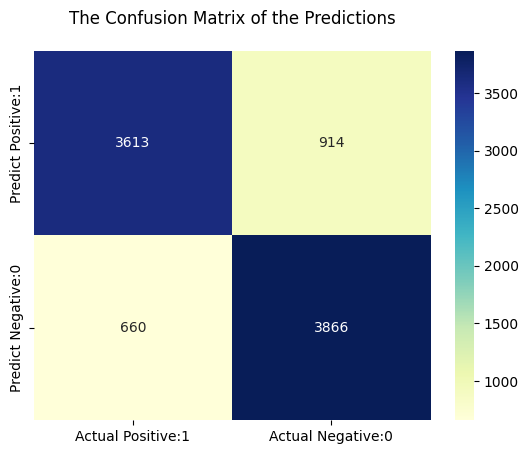

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Decision Tree Classifier Model Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4527
           1       0.86      0.86      0.86      4526

    accuracy                           0.86      9053
   macro avg       0.86      0.86      0.86      9053
weighted avg       0.86      0.86      0.86      9053
 



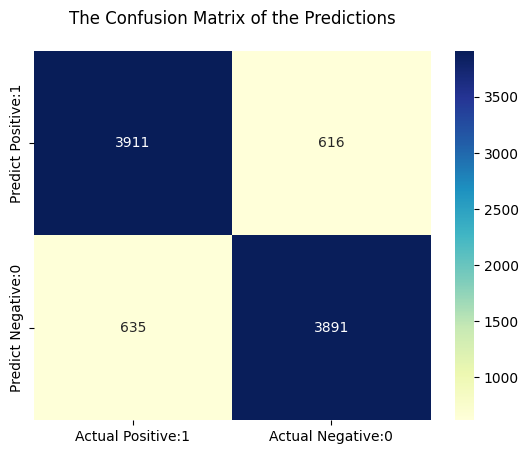

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Random Forest Model Model Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4527
           1       0.92      0.88      0.90      4526

    accuracy                           0.90      9053
   macro avg       0.90      0.90      0.90      9053
weighted avg       0.90      0.90      0.90      9053
 



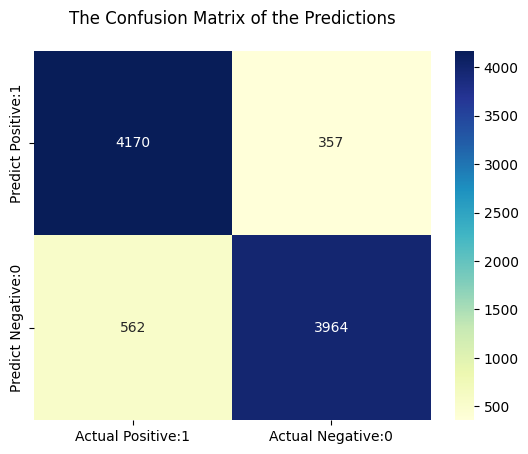

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

K Neighbor Nearest Algorithm Model Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      4527
           1       0.86      0.85      0.85      4526

    accuracy                           0.86      9053
   macro avg       0.86      0.86      0.86      9053
weighted avg       0.86      0.86      0.86      9053
 



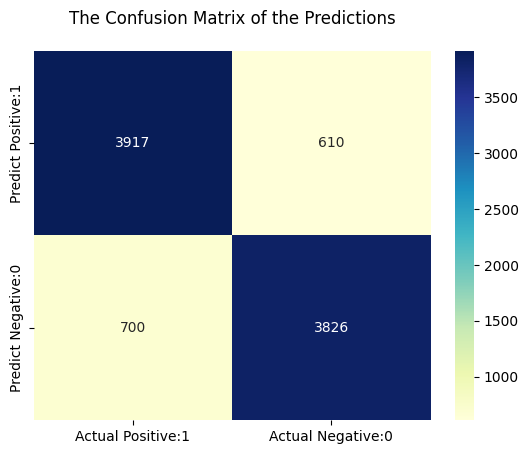

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Support Vector Machine Model Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      4527
           1       0.88      0.87      0.87      4526

    accuracy                           0.88      9053
   macro avg       0.88      0.88      0.88      9053
weighted avg       0.88      0.88      0.88      9053
 



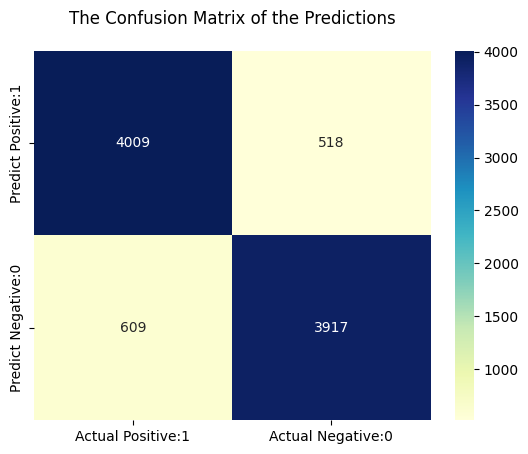

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4527
           1       0.93      0.89      0.91      4526

    accuracy                           0.91      9053
   macro avg       0.91      0.91      0.91      9053
weighted avg       0.91      0.91      0.91      9053
 



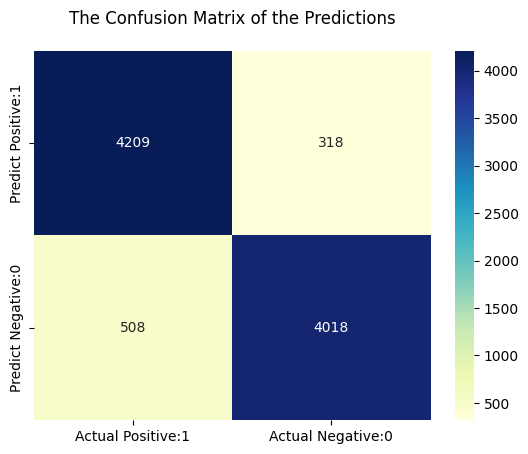

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4527
           1       0.93      0.89      0.91      4526

    accuracy                           0.91      9053
   macro avg       0.91      0.91      0.91      9053
weighted avg       0.91      0.91      0.91      9053
 



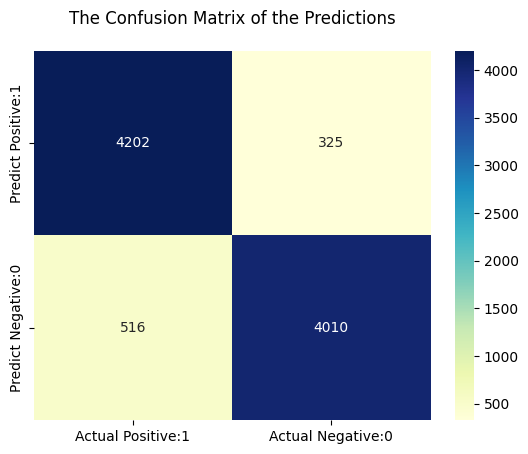

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 



,precision,recall,f1_score,accuracy
model,,,,
LightGBM,0.926661,0.887760,0.906793,0.908760
XGBoost,0.925029,0.885992,0.905090,0.907103
Random Forest Model,0.917380,0.875829,0.896123,0.898487
Support Vector Machine,0.883202,0.865444,0.874233,0.875511
Decision Tree Classifier,0.863324,0.859700,0.861508,0.861814
K Neighbor Nearest Algorithm,0.862489,0.845338,0.853827,0.855297
Logistic Regressor,0.808787,0.854176,0.830862,0.826135


In [56]:
model_performances = classification_fit_and_score(models)
model_performances

In [57]:
#saving best model
saved_model = pickle.dumps(lgb_model)
#saved_model